In [24]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans

### Read in the CSV file and prepare the Pandas DataFrame

In [25]:
# Read the csv file into a pandas DataFrame
customers_transformed_df = pd.read_csv("Resources/customers.csv")

# Review the DataFrame
customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


In [26]:
customers_transformed_df.shape

(1000, 10)

### Step 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

In [27]:
# Import the PCA module
from sklearn.decomposition import PCA

In [28]:
# Instantiate the PCA instance and declare the number of PCA variables
pca=PCA(n_components=2)

In [29]:
# Fit the PCA model on the transformed credit card DataFrame
customers_pca = pca.fit_transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
customers_pca[:5]

array([[-4.72382358, -0.60489964],
       [ 5.85571568, -1.98331135],
       [ 2.43063042, -3.15456594],
       [-6.96050326, -1.35772617],
       [ 2.47746793, -3.29412896]])

### Step 2: Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.

In [30]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.55083554, 0.30256389])

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** About 85% of the total variance is condensed into the 2 PCA variables.

### Step 3: Using the `customer_pca` data, create a Pandas DataFrame called customers_pca_df. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [31]:
# Create the PCA DataFrame
customers_pca_df = pd.DataFrame(
    customers_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
customers_pca_df.head()

,PCA1,PCA2
0,-4.723824,-0.604900
1,5.855716,-1.983311
2,2.430630,-3.154566
3,-6.960503,-1.357726
4,2.477468,-3.294129


### Step 4: Using the `customers_pca_df` Dataframe, utilize the elbow method to determine the optimal value of k.

In [32]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(customers_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,49585.714978
1,2,23750.955470
2,3,8773.172935
3,4,6840.237425
4,5,5378.897735


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

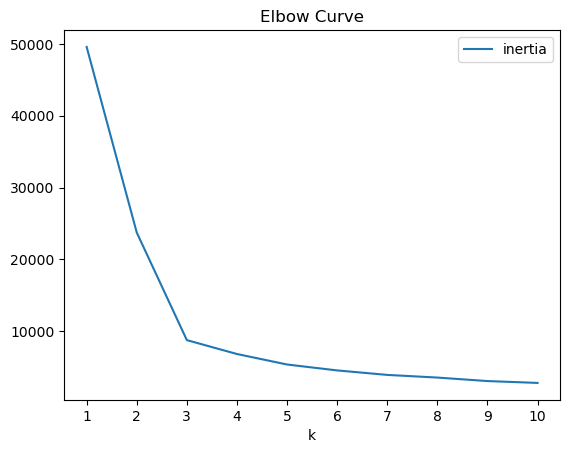

In [33]:
# Plot the DataFrame
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

### Step 5: Segment the `customers_pca_df`  DataFrame using the K-means algorithm.

In [34]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(customers_pca_df)

# Make predictions
k_3 = model.predict(customers_pca_df)

# Create a copy of the customers_pca_df DataFrame
customer_pca_predictions_df = customers_pca_df.copy()

# Add a class column with the labels
customer_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

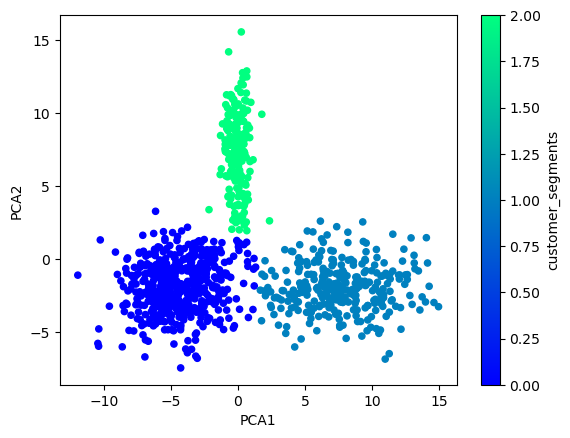

In [35]:
# Plot the clusters
customer_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

### Step 6: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [36]:
# Define the model Kmeans model using k=3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(customers_transformed_df)

# Make predictions
k_3 = model.predict(customers_transformed_df)

# Create a copy of the customers_transformed_df DataFrame
customers_transformed_predictions_df = customers_transformed_df.copy()

# Add a class column with the labels
customers_transformed_predictions_df["customer_segments"] = k_3

<Axes: xlabel='feature_1', ylabel='feature_2'>

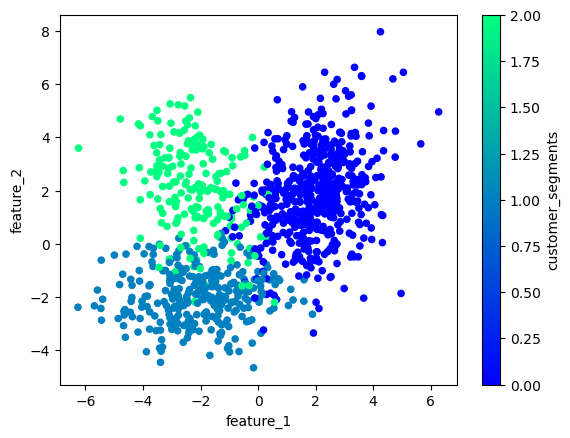

In [37]:
# Plot the clusters using the first any two feature columns
customers_transformed_predictions_df.plot.scatter(
    x="feature_1",
    y="feature_2",
    c="customer_segments",
    colormap='winter')

<Axes: xlabel='feature_1', ylabel='feature_9'>

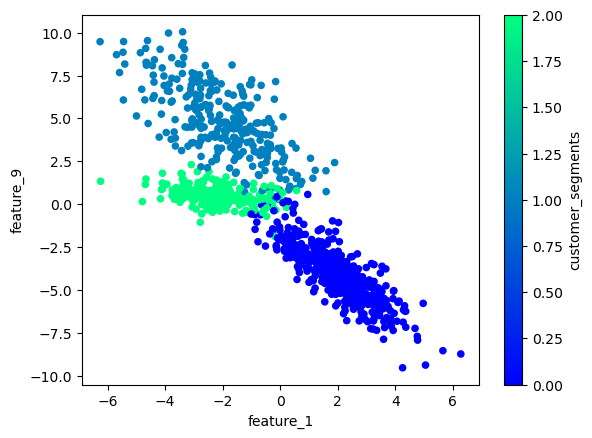

In [40]:
# Plot the clusters using the first any two feature columns
customers_transformed_predictions_df.plot.scatter(
    x="feature_1",
    y="feature_9",
    c="customer_segments",
    colormap='winter')

### Step 7. Which features have the strongest influence on each component? And, plot the most influencial features for each component. 


In [14]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=customers_transformed_df.columns)
pca_component_weights

,PCA1,PCA2
feature_1,-0.340915,-0.306228
feature_2,-0.329057,0.164556
feature_3,0.030257,-0.021689
feature_4,-0.185070,-0.105105
feature_5,-0.161058,-0.337265
feature_6,0.285823,-0.661727
feature_7,0.095942,0.320866
feature_8,-0.283924,0.194579
feature_9,0.736551,0.132907
feature_10,-0.019298,0.396887


**Answer:** 
- "feature_6" and "feature_9" have the strongest positive influence on PCA1. 
- "feature_7" and "feature_10" have the strongest positive influence on PCA2, whereas "feature_6" has the strong negative influence on PCA2.

### Step 8: Create a scatter plot of the most influential features for each component and customer segments.

<Axes: xlabel='feature_9', ylabel='feature_7'>

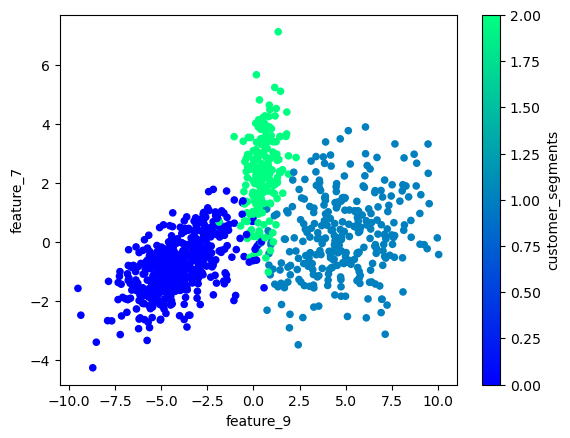

In [41]:
# Plot the features that are the most influencial for each component. 
customers_transformed_predictions_df.plot.scatter(
    x="feature_9",
    y="feature_7",
    c="customer_segments",
    colormap='winter')

<Axes: xlabel='feature_9', ylabel='feature_10'>

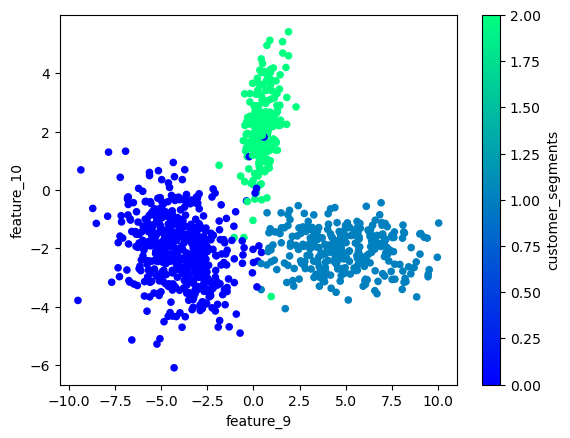

In [42]:
# Plot the clusters using the most influencial features for each component. 
customers_transformed_predictions_df.plot.scatter(
    x="feature_9",
    y="feature_10",
    c="customer_segments",
    colormap='winter')

### Step 9: What is the difference between the segmentation results of the PCA DataFrame and most influential features for each component? 

**Answer:** It appears that the customer segmentation information using the DataFrame with "feature_9" and "feature_10" yields similar results that the PCA analysis. 